In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as dset
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, models, transforms
import os
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import time

In [2]:
batch_size = 100#batch_size will be used to get accuracy
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(96),
        transforms.CenterCrop(128),
        transforms.Grayscale(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(96),
        transforms.CenterCrop(128),
        transforms.Grayscale(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'validation': transforms.Compose([
        transforms.Resize(96),
        transforms.CenterCrop(128),
        transforms.Grayscale(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}
data_dir = 'data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train','test','validation']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size,
                                             shuffle=True,num_workers=4)
              for x in ['train','test','validation']}

In [3]:
class ConvNet_L6_A(nn.Module):
    def __init__(self):
        super(ConvNet_L6_A, self).__init__()
        self.all_losses = []
        self.test_accuracy = []
        self.train_accuracy = []
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)
        self.fc1 = nn.Linear(16*16*128,1024)
        self.fc2 = nn.Linear(1024,512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)#input size, no need to change if input image doesn't change its size
        x = F.max_pool2d(F.relu(self.conv1(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2, 2)
        x = x.view(-1, 16*16*128)#3 Maxpooling from 128 down sampled to 16, 128 is channel of last Conv output not size 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim = 1)

In [4]:
class ConvNet_L6_B(nn.Module):
    def __init__(self):
        super(ConvNet_L6_B, self).__init__()
        self.all_losses = []
        self.test_accuracy = []
        self.train_accuracy = []
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)
        self.fc1 = nn.Linear(16*16*128,1024)
        self.fc2 = nn.Linear(1024,512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)#input size, no need to change if input image doesn't change its size
        x = F.max_pool2d(F.relu(self.conv1(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2, 2)
        x = x.view(-1, 16*16*128)#3 Maxpooling from 128 down sampled to 16, 128 is channel of last Conv output not size 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return F.log_softmax(x, dim = 1)

In [5]:
class ConvNet_L6_C(nn.Module):
    def __init__(self):
        super(ConvNet_L6_C, self).__init__()
        self.all_losses = []
        self.test_accuracy = []
        self.train_accuracy = []
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)
        self.fc1 = nn.Linear(16*16*128,1024)
        self.fc2 = nn.Linear(1024,512)
        self.fc3 = nn.Linear(512, 512)
        self.fc4 = nn.Linear(512, 512)
        self.fc5 = nn.Linear(512, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)#input size, no need to change if input image doesn't change its size
        x = F.max_pool2d(F.relu(self.conv1(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2, 2)
        x = x.view(-1, 16*16*128)#3 Maxpooling from 128 down sampled to 16, 128 is channel of last Conv output not size 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return F.log_softmax(x, dim = 1)

In [6]:
class ConvNet_L6_D(nn.Module):
    def __init__(self):
        super(ConvNet_L6_D, self).__init__()
        self.all_losses = []
        self.test_accuracy = []
        self.train_accuracy = []
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)
        self.fc1 = nn.Linear(16*16*128,1024)
        self.fc2 = nn.Linear(1024,512)
        self.fc3 = nn.Linear(512, 512)
        self.fc4 = nn.Linear(512, 256)
        self.fc5 = nn.Linear(256, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)#input size, no need to change if input image doesn't change its size
        x = F.max_pool2d(F.relu(self.conv1(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2, 2)
        x = x.view(-1, 16*16*128)#3 Maxpooling from 128 down sampled to 16, 128 is channel of last Conv output not size 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return F.log_softmax(x, dim = 1)

In [7]:
class ConvNet_L6_E(nn.Module):
    def __init__(self):
        super(ConvNet_L6_E, self).__init__()
        self.all_losses = []
        self.test_accuracy = []
        self.train_accuracy = []
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)
        self.fc1 = nn.Linear(16*16*128,1024)
        self.fc2 = nn.Linear(1024,512)
        self.fc3 = nn.Linear(512, 512)
        self.fc4 = nn.Linear(512, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)#input size, no need to change if input image doesn't change its size
        x = F.max_pool2d(F.relu(self.conv1(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2, 2)
        x = x.view(-1, 16*16*128)#3 Maxpooling from 128 down sampled to 16, 128 is channel of last Conv output not size 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim = 1)

In [ ]:
# class ConvNet_L6_F(nn.Module):
#     def __init__(self):
#         super(ConvNet_L6_F, self).__init__()
#         self.all_losses = []
#         self.test_accuracy = []
#         self.train_accuracy = []
#         self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
#         self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
#         self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)
#         self.fc1 = nn.Linear(16*16*128,4000)
#         self.fc2 = nn.Linear(4000,2048)
#         self.fc3 = nn.Linear(2048, 1024)
#         self.fc4 = nn.Linear(1024, 512)
#         self.fc5 = nn.Linear(512, 512)
#         self.fc6 = nn.Linear(512, 100)

#     def forward(self, x):
#         x = x.view(-1,1,128,128)#input size, no need to change if input image doesn't change its size
#         x = F.max_pool2d(F.relu(self.conv1(x)), 2, 2)
#         x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
#         x = F.max_pool2d(F.relu(self.conv3(x)), 2, 2)
#         x = x.view(-1, 16*16*128)#3 Maxpooling from 128 down sampled to 16, 128 is channel of last Conv output not size 
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = F.relu(self.fc3(x))
#         x = F.relu(self.fc4(x))
#         x = F.relu(self.fc5(x))
#         x = self.fc6(x)
#         return F.log_softmax(x, dim = 1)

In [8]:
def AccuracyHelper(model,dataset):
    count = 0
    for batch_idx, (data,target) in enumerate(dataset):
        data, target = Variable(data.cuda()), Variable(target.cuda())
        y_pred = model(data)#model
        prediction = torch.max(F.softmax(y_pred, dim = 1), 1)[1]
        pred_y = prediction.cpu().data.numpy().squeeze()
        target_y = target.cpu().data.numpy()
        count += sum(pred_y == target_y)
    accuracy = float(count)/float(batch_size*len(dataset))
    model.test_accuracy.append(accuracy)
    print('accuracy on test set: {:.3f}%'.format(100*accuracy),count)

In [9]:
class Training():
    def __init__(self,dataloaders,ConvNet,lr = 0.01, epoch = 30):
        self.criteria = nn.CrossEntropyLoss()
        self.model = ConvNet
        self.optimizer = optim.SGD(ConvNet.parameters(), lr=lr, momentum=0.9)
        self.log_interval=10#log_interval * batch_size = the number of displayed samples
        self.epoch = epoch
        self.data = dataloaders
        self.ConvNet = ConvNet
        
    def start(self):
        for epoch in range(self.epoch):#set epoch of iteration
            for batch_idx, (data,target) in enumerate(self.data['train']):
                data, target = Variable(data.cuda()), Variable(target.cuda())#turn x,y from tensors to Variables
                y_pred = self.model(data)#feed x, return prediction on the sample
                prediction = torch.max(F.softmax(y_pred), 1)[1]
                pred_y = prediction.cpu().data.numpy().squeeze()
                target_y = target.cpu().data.numpy()
                loss = self.criteria(y_pred, target)#cal loss
                self.optimizer.zero_grad()#set all gradient to 0
                loss.backward()#begin backprop
                self.optimizer.step()#cal grad
                if batch_idx % self.log_interval == 0:#display progress
                    accuracy = sum(pred_y == target_y) / 100.0
                    self.ConvNet.all_losses.append(loss.data[0])
                    self.ConvNet.train_accuracy.append(accuracy)
                    print('Train Epoch: {} [{}/{} ({:.3f}%)]\tLoss: {:.6f}\tAccuracy: {:.3f}'.format(
                        epoch, batch_size*batch_idx, batch_size*len(self.data['train']),
                        100. * batch_idx / len(self.data['train']), loss.data[0], accuracy))
            AccuracyHelper(self.model,self.data['test'])

In [10]:
model_l6_a = ConvNet_L6_A()
model_l6_a.cuda()
model_l6_b = ConvNet_L6_B()
model_l6_b.cuda()
model_l6_c = ConvNet_L6_C()
model_l6_c.cuda()
model_l6_d = ConvNet_L6_D()
model_l6_d.cuda()
model_l6_e = ConvNet_L6_E()
model_l6_e.cuda()

ConvNet_L6_E(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=32768, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=512, bias=True)
  (fc4): Linear(in_features=512, out_features=100, bias=True)
)

In [ ]:
# model_l6_f = ConvNet_L6_F()
# model_l6_f.cuda()

In [ ]:
# start_time = time.time()
# train = Training(dataloaders, model_l6_f,0.01)
# train.start()
# print("--- %s seconds ---" % (time.time() - start_time))

In [15]:
start_time = time.time()
train = Training(dataloaders, model_l6_a,0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/38000 (0.000%)]	Loss: 4.608576	Accuracy: 0.000
Train Epoch: 0 [1000/38000 (2.632%)]	Loss: 4.609817	Accuracy: 0.010
Train Epoch: 0 [2000/38000 (5.263%)]	Loss: 4.606020	Accuracy: 0.000
Train Epoch: 0 [3000/38000 (7.895%)]	Loss: 4.603630	Accuracy: 0.010
Train Epoch: 0 [4000/38000 (10.526%)]	Loss: 4.609830	Accuracy: 0.000
Train Epoch: 0 [5000/38000 (13.158%)]	Loss: 4.606911	Accuracy: 0.010
Train Epoch: 0 [6000/38000 (15.789%)]	Loss: 4.610126	Accuracy: 0.020
Train Epoch: 0 [7000/38000 (18.421%)]	Loss: 4.604157	Accuracy: 0.030
Train Epoch: 0 [8000/38000 (21.053%)]	Loss: 4.603443	Accuracy: 0.010
Train Epoch: 0 [9000/38000 (23.684%)]	Loss: 4.606569	Accuracy: 0.010
Train Epoch: 0 [10000/38000 (26.316%)]	Loss: 4.610231	Accuracy: 0.010
Train Epoch: 0 [11000/38000 (28.947%)]	Loss: 4.608864	Accuracy: 0.000
Train Epoch: 0 [12000/38000 (31.579%)]	Loss: 4.598866	Accuracy: 0.010
Train Epoch: 0 [13000/38000 (34.211%)]	Loss: 4.603559	Accuracy: 0.010
Train Epoch: 0 [14000/38000 (36.842%)

Train Epoch: 3 [3000/38000 (7.895%)]	Loss: 1.523943	Accuracy: 0.610
Train Epoch: 3 [4000/38000 (10.526%)]	Loss: 1.613192	Accuracy: 0.590
Train Epoch: 3 [5000/38000 (13.158%)]	Loss: 1.311330	Accuracy: 0.660
Train Epoch: 3 [6000/38000 (15.789%)]	Loss: 1.447245	Accuracy: 0.600
Train Epoch: 3 [7000/38000 (18.421%)]	Loss: 1.540275	Accuracy: 0.650
Train Epoch: 3 [8000/38000 (21.053%)]	Loss: 1.514021	Accuracy: 0.590
Train Epoch: 3 [9000/38000 (23.684%)]	Loss: 1.287807	Accuracy: 0.630
Train Epoch: 3 [10000/38000 (26.316%)]	Loss: 1.349882	Accuracy: 0.710
Train Epoch: 3 [11000/38000 (28.947%)]	Loss: 1.210495	Accuracy: 0.720
Train Epoch: 3 [12000/38000 (31.579%)]	Loss: 1.514989	Accuracy: 0.620
Train Epoch: 3 [13000/38000 (34.211%)]	Loss: 1.492144	Accuracy: 0.570
Train Epoch: 3 [14000/38000 (36.842%)]	Loss: 1.492823	Accuracy: 0.600
Train Epoch: 3 [15000/38000 (39.474%)]	Loss: 1.489159	Accuracy: 0.560
Train Epoch: 3 [16000/38000 (42.105%)]	Loss: 1.235803	Accuracy: 0.680
Train Epoch: 3 [17000/38000 

Train Epoch: 6 [6000/38000 (15.789%)]	Loss: 0.293236	Accuracy: 0.940
Train Epoch: 6 [7000/38000 (18.421%)]	Loss: 0.173260	Accuracy: 0.970
Train Epoch: 6 [8000/38000 (21.053%)]	Loss: 0.359195	Accuracy: 0.870
Train Epoch: 6 [9000/38000 (23.684%)]	Loss: 0.265975	Accuracy: 0.920
Train Epoch: 6 [10000/38000 (26.316%)]	Loss: 0.377754	Accuracy: 0.870
Train Epoch: 6 [11000/38000 (28.947%)]	Loss: 0.445299	Accuracy: 0.900
Train Epoch: 6 [12000/38000 (31.579%)]	Loss: 0.361802	Accuracy: 0.910
Train Epoch: 6 [13000/38000 (34.211%)]	Loss: 0.290266	Accuracy: 0.920
Train Epoch: 6 [14000/38000 (36.842%)]	Loss: 0.249042	Accuracy: 0.940
Train Epoch: 6 [15000/38000 (39.474%)]	Loss: 0.447861	Accuracy: 0.890
Train Epoch: 6 [16000/38000 (42.105%)]	Loss: 0.397113	Accuracy: 0.850
Train Epoch: 6 [17000/38000 (44.737%)]	Loss: 0.230504	Accuracy: 0.910
Train Epoch: 6 [18000/38000 (47.368%)]	Loss: 0.487362	Accuracy: 0.860
Train Epoch: 6 [19000/38000 (50.000%)]	Loss: 0.373735	Accuracy: 0.900
Train Epoch: 6 [20000/38

Train Epoch: 9 [9000/38000 (23.684%)]	Loss: 0.161835	Accuracy: 0.960
Train Epoch: 9 [10000/38000 (26.316%)]	Loss: 0.155590	Accuracy: 0.950
Train Epoch: 9 [11000/38000 (28.947%)]	Loss: 0.079764	Accuracy: 0.970
Train Epoch: 9 [12000/38000 (31.579%)]	Loss: 0.052098	Accuracy: 0.980
Train Epoch: 9 [13000/38000 (34.211%)]	Loss: 0.194057	Accuracy: 0.930
Train Epoch: 9 [14000/38000 (36.842%)]	Loss: 0.194962	Accuracy: 0.940
Train Epoch: 9 [15000/38000 (39.474%)]	Loss: 0.116019	Accuracy: 0.950
Train Epoch: 9 [16000/38000 (42.105%)]	Loss: 0.192060	Accuracy: 0.940
Train Epoch: 9 [17000/38000 (44.737%)]	Loss: 0.273720	Accuracy: 0.950
Train Epoch: 9 [18000/38000 (47.368%)]	Loss: 0.100448	Accuracy: 0.970
Train Epoch: 9 [19000/38000 (50.000%)]	Loss: 0.046718	Accuracy: 0.990
Train Epoch: 9 [20000/38000 (52.632%)]	Loss: 0.138558	Accuracy: 0.940
Train Epoch: 9 [21000/38000 (55.263%)]	Loss: 0.093484	Accuracy: 0.980
Train Epoch: 9 [22000/38000 (57.895%)]	Loss: 0.101186	Accuracy: 0.980
Train Epoch: 9 [23000

Train Epoch: 12 [11000/38000 (28.947%)]	Loss: 0.052891	Accuracy: 0.980
Train Epoch: 12 [12000/38000 (31.579%)]	Loss: 0.026811	Accuracy: 0.990
Train Epoch: 12 [13000/38000 (34.211%)]	Loss: 0.053922	Accuracy: 0.970
Train Epoch: 12 [14000/38000 (36.842%)]	Loss: 0.021345	Accuracy: 1.000
Train Epoch: 12 [15000/38000 (39.474%)]	Loss: 0.025057	Accuracy: 0.990
Train Epoch: 12 [16000/38000 (42.105%)]	Loss: 0.032479	Accuracy: 0.980
Train Epoch: 12 [17000/38000 (44.737%)]	Loss: 0.031178	Accuracy: 0.990
Train Epoch: 12 [18000/38000 (47.368%)]	Loss: 0.047487	Accuracy: 0.990
Train Epoch: 12 [19000/38000 (50.000%)]	Loss: 0.082835	Accuracy: 0.990
Train Epoch: 12 [20000/38000 (52.632%)]	Loss: 0.016509	Accuracy: 0.990
Train Epoch: 12 [21000/38000 (55.263%)]	Loss: 0.026256	Accuracy: 0.990
Train Epoch: 12 [22000/38000 (57.895%)]	Loss: 0.011870	Accuracy: 1.000
Train Epoch: 12 [23000/38000 (60.526%)]	Loss: 0.014570	Accuracy: 1.000
Train Epoch: 12 [24000/38000 (63.158%)]	Loss: 0.024049	Accuracy: 0.990
Train 

Train Epoch: 15 [12000/38000 (31.579%)]	Loss: 0.137743	Accuracy: 0.950
Train Epoch: 15 [13000/38000 (34.211%)]	Loss: 0.049587	Accuracy: 0.990
Train Epoch: 15 [14000/38000 (36.842%)]	Loss: 0.059191	Accuracy: 0.980
Train Epoch: 15 [15000/38000 (39.474%)]	Loss: 0.064190	Accuracy: 0.970
Train Epoch: 15 [16000/38000 (42.105%)]	Loss: 0.009882	Accuracy: 1.000
Train Epoch: 15 [17000/38000 (44.737%)]	Loss: 0.054098	Accuracy: 0.990
Train Epoch: 15 [18000/38000 (47.368%)]	Loss: 0.045076	Accuracy: 0.990
Train Epoch: 15 [19000/38000 (50.000%)]	Loss: 0.007295	Accuracy: 1.000
Train Epoch: 15 [20000/38000 (52.632%)]	Loss: 0.087574	Accuracy: 0.960
Train Epoch: 15 [21000/38000 (55.263%)]	Loss: 0.005672	Accuracy: 1.000
Train Epoch: 15 [22000/38000 (57.895%)]	Loss: 0.014869	Accuracy: 1.000
Train Epoch: 15 [23000/38000 (60.526%)]	Loss: 0.027388	Accuracy: 1.000
Train Epoch: 15 [24000/38000 (63.158%)]	Loss: 0.043170	Accuracy: 0.990
Train Epoch: 15 [25000/38000 (65.789%)]	Loss: 0.009853	Accuracy: 1.000
Train 

Train Epoch: 18 [13000/38000 (34.211%)]	Loss: 0.036638	Accuracy: 0.980
Train Epoch: 18 [14000/38000 (36.842%)]	Loss: 0.068976	Accuracy: 0.970
Train Epoch: 18 [15000/38000 (39.474%)]	Loss: 0.007634	Accuracy: 1.000
Train Epoch: 18 [16000/38000 (42.105%)]	Loss: 0.027855	Accuracy: 1.000
Train Epoch: 18 [17000/38000 (44.737%)]	Loss: 0.004786	Accuracy: 1.000
Train Epoch: 18 [18000/38000 (47.368%)]	Loss: 0.014532	Accuracy: 0.990
Train Epoch: 18 [19000/38000 (50.000%)]	Loss: 0.060821	Accuracy: 0.980
Train Epoch: 18 [20000/38000 (52.632%)]	Loss: 0.008562	Accuracy: 1.000
Train Epoch: 18 [21000/38000 (55.263%)]	Loss: 0.011547	Accuracy: 1.000
Train Epoch: 18 [22000/38000 (57.895%)]	Loss: 0.005957	Accuracy: 1.000
Train Epoch: 18 [23000/38000 (60.526%)]	Loss: 0.005144	Accuracy: 1.000
Train Epoch: 18 [24000/38000 (63.158%)]	Loss: 0.012510	Accuracy: 0.990
Train Epoch: 18 [25000/38000 (65.789%)]	Loss: 0.002638	Accuracy: 1.000
Train Epoch: 18 [26000/38000 (68.421%)]	Loss: 0.020771	Accuracy: 0.990
Train 

Train Epoch: 21 [14000/38000 (36.842%)]	Loss: 0.049017	Accuracy: 0.990
Train Epoch: 21 [15000/38000 (39.474%)]	Loss: 0.000659	Accuracy: 1.000
Train Epoch: 21 [16000/38000 (42.105%)]	Loss: 0.009739	Accuracy: 0.990
Train Epoch: 21 [17000/38000 (44.737%)]	Loss: 0.001801	Accuracy: 1.000
Train Epoch: 21 [18000/38000 (47.368%)]	Loss: 0.002103	Accuracy: 1.000
Train Epoch: 21 [19000/38000 (50.000%)]	Loss: 0.001411	Accuracy: 1.000
Train Epoch: 21 [20000/38000 (52.632%)]	Loss: 0.007405	Accuracy: 1.000
Train Epoch: 21 [21000/38000 (55.263%)]	Loss: 0.031622	Accuracy: 0.990
Train Epoch: 21 [22000/38000 (57.895%)]	Loss: 0.035757	Accuracy: 0.990
Train Epoch: 21 [23000/38000 (60.526%)]	Loss: 0.034889	Accuracy: 0.990
Train Epoch: 21 [24000/38000 (63.158%)]	Loss: 0.033737	Accuracy: 0.990
Train Epoch: 21 [25000/38000 (65.789%)]	Loss: 0.004553	Accuracy: 1.000
Train Epoch: 21 [26000/38000 (68.421%)]	Loss: 0.002052	Accuracy: 1.000
Train Epoch: 21 [27000/38000 (71.053%)]	Loss: 0.000184	Accuracy: 1.000
Train 

Train Epoch: 24 [15000/38000 (39.474%)]	Loss: 0.009702	Accuracy: 0.990
Train Epoch: 24 [16000/38000 (42.105%)]	Loss: 0.005429	Accuracy: 1.000
Train Epoch: 24 [17000/38000 (44.737%)]	Loss: 0.002065	Accuracy: 1.000
Train Epoch: 24 [18000/38000 (47.368%)]	Loss: 0.025598	Accuracy: 0.990
Train Epoch: 24 [19000/38000 (50.000%)]	Loss: 0.008716	Accuracy: 0.990
Train Epoch: 24 [20000/38000 (52.632%)]	Loss: 0.001930	Accuracy: 1.000
Train Epoch: 24 [21000/38000 (55.263%)]	Loss: 0.003600	Accuracy: 1.000
Train Epoch: 24 [22000/38000 (57.895%)]	Loss: 0.003556	Accuracy: 1.000
Train Epoch: 24 [23000/38000 (60.526%)]	Loss: 0.007038	Accuracy: 1.000
Train Epoch: 24 [24000/38000 (63.158%)]	Loss: 0.005785	Accuracy: 1.000
Train Epoch: 24 [25000/38000 (65.789%)]	Loss: 0.001244	Accuracy: 1.000
Train Epoch: 24 [26000/38000 (68.421%)]	Loss: 0.114367	Accuracy: 0.980
Train Epoch: 24 [27000/38000 (71.053%)]	Loss: 0.015097	Accuracy: 0.990
Train Epoch: 24 [28000/38000 (73.684%)]	Loss: 0.060339	Accuracy: 0.990
Train 

Train Epoch: 27 [16000/38000 (42.105%)]	Loss: 0.000172	Accuracy: 1.000
Train Epoch: 27 [17000/38000 (44.737%)]	Loss: 0.000418	Accuracy: 1.000
Train Epoch: 27 [18000/38000 (47.368%)]	Loss: 0.001463	Accuracy: 1.000
Train Epoch: 27 [19000/38000 (50.000%)]	Loss: 0.000682	Accuracy: 1.000
Train Epoch: 27 [20000/38000 (52.632%)]	Loss: 0.000243	Accuracy: 1.000
Train Epoch: 27 [21000/38000 (55.263%)]	Loss: 0.001825	Accuracy: 1.000
Train Epoch: 27 [22000/38000 (57.895%)]	Loss: 0.000091	Accuracy: 1.000
Train Epoch: 27 [23000/38000 (60.526%)]	Loss: 0.001291	Accuracy: 1.000
Train Epoch: 27 [24000/38000 (63.158%)]	Loss: 0.000277	Accuracy: 1.000
Train Epoch: 27 [25000/38000 (65.789%)]	Loss: 0.016512	Accuracy: 0.990
Train Epoch: 27 [26000/38000 (68.421%)]	Loss: 0.000061	Accuracy: 1.000
Train Epoch: 27 [27000/38000 (71.053%)]	Loss: 0.000350	Accuracy: 1.000
Train Epoch: 27 [28000/38000 (73.684%)]	Loss: 0.000053	Accuracy: 1.000
Train Epoch: 27 [29000/38000 (76.316%)]	Loss: 0.002468	Accuracy: 1.000
Train 

In [16]:
start_time = time.time()
train = Training(dataloaders, model_l6_b,0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/38000 (0.000%)]	Loss: 4.595005	Accuracy: 0.030
Train Epoch: 0 [1000/38000 (2.632%)]	Loss: 4.600446	Accuracy: 0.060
Train Epoch: 0 [2000/38000 (5.263%)]	Loss: 4.597769	Accuracy: 0.010
Train Epoch: 0 [3000/38000 (7.895%)]	Loss: 4.611314	Accuracy: 0.020
Train Epoch: 0 [4000/38000 (10.526%)]	Loss: 4.604061	Accuracy: 0.010
Train Epoch: 0 [5000/38000 (13.158%)]	Loss: 4.611566	Accuracy: 0.000
Train Epoch: 0 [6000/38000 (15.789%)]	Loss: 4.609920	Accuracy: 0.000
Train Epoch: 0 [7000/38000 (18.421%)]	Loss: 4.604344	Accuracy: 0.000
Train Epoch: 0 [8000/38000 (21.053%)]	Loss: 4.603983	Accuracy: 0.000
Train Epoch: 0 [9000/38000 (23.684%)]	Loss: 4.616108	Accuracy: 0.000
Train Epoch: 0 [10000/38000 (26.316%)]	Loss: 4.603821	Accuracy: 0.010
Train Epoch: 0 [11000/38000 (28.947%)]	Loss: 4.602389	Accuracy: 0.030
Train Epoch: 0 [12000/38000 (31.579%)]	Loss: 4.609167	Accuracy: 0.000
Train Epoch: 0 [13000/38000 (34.211%)]	Loss: 4.611663	Accuracy: 0.000
Train Epoch: 0 [14000/38000 (36.842%)

Train Epoch: 3 [3000/38000 (7.895%)]	Loss: 2.707833	Accuracy: 0.270
Train Epoch: 3 [4000/38000 (10.526%)]	Loss: 3.272687	Accuracy: 0.150
Train Epoch: 3 [5000/38000 (13.158%)]	Loss: 3.136971	Accuracy: 0.310
Train Epoch: 3 [6000/38000 (15.789%)]	Loss: 2.970752	Accuracy: 0.270
Train Epoch: 3 [7000/38000 (18.421%)]	Loss: 2.866490	Accuracy: 0.230
Train Epoch: 3 [8000/38000 (21.053%)]	Loss: 2.754439	Accuracy: 0.270
Train Epoch: 3 [9000/38000 (23.684%)]	Loss: 2.520873	Accuracy: 0.340
Train Epoch: 3 [10000/38000 (26.316%)]	Loss: 2.777306	Accuracy: 0.280
Train Epoch: 3 [11000/38000 (28.947%)]	Loss: 3.072304	Accuracy: 0.260
Train Epoch: 3 [12000/38000 (31.579%)]	Loss: 3.139779	Accuracy: 0.290
Train Epoch: 3 [13000/38000 (34.211%)]	Loss: 3.170913	Accuracy: 0.260
Train Epoch: 3 [14000/38000 (36.842%)]	Loss: 2.711797	Accuracy: 0.320
Train Epoch: 3 [15000/38000 (39.474%)]	Loss: 2.621958	Accuracy: 0.370
Train Epoch: 3 [16000/38000 (42.105%)]	Loss: 2.456970	Accuracy: 0.410
Train Epoch: 3 [17000/38000 

Train Epoch: 6 [6000/38000 (15.789%)]	Loss: 0.560797	Accuracy: 0.810
Train Epoch: 6 [7000/38000 (18.421%)]	Loss: 0.545133	Accuracy: 0.900
Train Epoch: 6 [8000/38000 (21.053%)]	Loss: 0.496557	Accuracy: 0.840
Train Epoch: 6 [9000/38000 (23.684%)]	Loss: 0.436166	Accuracy: 0.880
Train Epoch: 6 [10000/38000 (26.316%)]	Loss: 0.748922	Accuracy: 0.820
Train Epoch: 6 [11000/38000 (28.947%)]	Loss: 0.618498	Accuracy: 0.840
Train Epoch: 6 [12000/38000 (31.579%)]	Loss: 0.665496	Accuracy: 0.780
Train Epoch: 6 [13000/38000 (34.211%)]	Loss: 0.599098	Accuracy: 0.800
Train Epoch: 6 [14000/38000 (36.842%)]	Loss: 0.424695	Accuracy: 0.850
Train Epoch: 6 [15000/38000 (39.474%)]	Loss: 0.587120	Accuracy: 0.820
Train Epoch: 6 [16000/38000 (42.105%)]	Loss: 0.565371	Accuracy: 0.840
Train Epoch: 6 [17000/38000 (44.737%)]	Loss: 0.457997	Accuracy: 0.840
Train Epoch: 6 [18000/38000 (47.368%)]	Loss: 0.975712	Accuracy: 0.730
Train Epoch: 6 [19000/38000 (50.000%)]	Loss: 0.647660	Accuracy: 0.780
Train Epoch: 6 [20000/38

Train Epoch: 9 [9000/38000 (23.684%)]	Loss: 0.170781	Accuracy: 0.950
Train Epoch: 9 [10000/38000 (26.316%)]	Loss: 0.126693	Accuracy: 0.950
Train Epoch: 9 [11000/38000 (28.947%)]	Loss: 0.139277	Accuracy: 0.940
Train Epoch: 9 [12000/38000 (31.579%)]	Loss: 0.199386	Accuracy: 0.960
Train Epoch: 9 [13000/38000 (34.211%)]	Loss: 0.165649	Accuracy: 0.950
Train Epoch: 9 [14000/38000 (36.842%)]	Loss: 0.182261	Accuracy: 0.940
Train Epoch: 9 [15000/38000 (39.474%)]	Loss: 0.132267	Accuracy: 0.930
Train Epoch: 9 [16000/38000 (42.105%)]	Loss: 0.149732	Accuracy: 0.940
Train Epoch: 9 [17000/38000 (44.737%)]	Loss: 0.205660	Accuracy: 0.930
Train Epoch: 9 [18000/38000 (47.368%)]	Loss: 0.099557	Accuracy: 0.980
Train Epoch: 9 [19000/38000 (50.000%)]	Loss: 0.276395	Accuracy: 0.900
Train Epoch: 9 [20000/38000 (52.632%)]	Loss: 0.068812	Accuracy: 0.990
Train Epoch: 9 [21000/38000 (55.263%)]	Loss: 0.110929	Accuracy: 0.970
Train Epoch: 9 [22000/38000 (57.895%)]	Loss: 0.234221	Accuracy: 0.930
Train Epoch: 9 [23000

Train Epoch: 12 [11000/38000 (28.947%)]	Loss: 0.080893	Accuracy: 0.970
Train Epoch: 12 [12000/38000 (31.579%)]	Loss: 0.090281	Accuracy: 0.980
Train Epoch: 12 [13000/38000 (34.211%)]	Loss: 0.150873	Accuracy: 0.950
Train Epoch: 12 [14000/38000 (36.842%)]	Loss: 0.129862	Accuracy: 0.960
Train Epoch: 12 [15000/38000 (39.474%)]	Loss: 0.103967	Accuracy: 0.980
Train Epoch: 12 [16000/38000 (42.105%)]	Loss: 0.054086	Accuracy: 0.990
Train Epoch: 12 [17000/38000 (44.737%)]	Loss: 0.058265	Accuracy: 0.980
Train Epoch: 12 [18000/38000 (47.368%)]	Loss: 0.138582	Accuracy: 0.950
Train Epoch: 12 [19000/38000 (50.000%)]	Loss: 0.039153	Accuracy: 0.990
Train Epoch: 12 [20000/38000 (52.632%)]	Loss: 0.109628	Accuracy: 0.950
Train Epoch: 12 [21000/38000 (55.263%)]	Loss: 0.112289	Accuracy: 0.940
Train Epoch: 12 [22000/38000 (57.895%)]	Loss: 0.043283	Accuracy: 0.990
Train Epoch: 12 [23000/38000 (60.526%)]	Loss: 0.094386	Accuracy: 0.980
Train Epoch: 12 [24000/38000 (63.158%)]	Loss: 0.027912	Accuracy: 0.990
Train 

Train Epoch: 15 [12000/38000 (31.579%)]	Loss: 0.079871	Accuracy: 0.960
Train Epoch: 15 [13000/38000 (34.211%)]	Loss: 0.044132	Accuracy: 0.990
Train Epoch: 15 [14000/38000 (36.842%)]	Loss: 0.019677	Accuracy: 1.000
Train Epoch: 15 [15000/38000 (39.474%)]	Loss: 0.040980	Accuracy: 0.990
Train Epoch: 15 [16000/38000 (42.105%)]	Loss: 0.020433	Accuracy: 0.990
Train Epoch: 15 [17000/38000 (44.737%)]	Loss: 0.061385	Accuracy: 0.980
Train Epoch: 15 [18000/38000 (47.368%)]	Loss: 0.010259	Accuracy: 1.000
Train Epoch: 15 [19000/38000 (50.000%)]	Loss: 0.009916	Accuracy: 1.000
Train Epoch: 15 [20000/38000 (52.632%)]	Loss: 0.022837	Accuracy: 0.990
Train Epoch: 15 [21000/38000 (55.263%)]	Loss: 0.053215	Accuracy: 0.970
Train Epoch: 15 [22000/38000 (57.895%)]	Loss: 0.091356	Accuracy: 0.990
Train Epoch: 15 [23000/38000 (60.526%)]	Loss: 0.034810	Accuracy: 0.980
Train Epoch: 15 [24000/38000 (63.158%)]	Loss: 0.069029	Accuracy: 0.980
Train Epoch: 15 [25000/38000 (65.789%)]	Loss: 0.110543	Accuracy: 0.970
Train 

Train Epoch: 18 [13000/38000 (34.211%)]	Loss: 0.001411	Accuracy: 1.000
Train Epoch: 18 [14000/38000 (36.842%)]	Loss: 0.076548	Accuracy: 0.990
Train Epoch: 18 [15000/38000 (39.474%)]	Loss: 0.023496	Accuracy: 0.990
Train Epoch: 18 [16000/38000 (42.105%)]	Loss: 0.031623	Accuracy: 0.990
Train Epoch: 18 [17000/38000 (44.737%)]	Loss: 0.041205	Accuracy: 0.990
Train Epoch: 18 [18000/38000 (47.368%)]	Loss: 0.062997	Accuracy: 0.980
Train Epoch: 18 [19000/38000 (50.000%)]	Loss: 0.047017	Accuracy: 0.980
Train Epoch: 18 [20000/38000 (52.632%)]	Loss: 0.030637	Accuracy: 0.990
Train Epoch: 18 [21000/38000 (55.263%)]	Loss: 0.056888	Accuracy: 0.980
Train Epoch: 18 [22000/38000 (57.895%)]	Loss: 0.111236	Accuracy: 0.960
Train Epoch: 18 [23000/38000 (60.526%)]	Loss: 0.008736	Accuracy: 1.000
Train Epoch: 18 [24000/38000 (63.158%)]	Loss: 0.025831	Accuracy: 1.000
Train Epoch: 18 [25000/38000 (65.789%)]	Loss: 0.096061	Accuracy: 0.970
Train Epoch: 18 [26000/38000 (68.421%)]	Loss: 0.040750	Accuracy: 0.990
Train 

Train Epoch: 21 [14000/38000 (36.842%)]	Loss: 0.001577	Accuracy: 1.000
Train Epoch: 21 [15000/38000 (39.474%)]	Loss: 0.033457	Accuracy: 0.980
Train Epoch: 21 [16000/38000 (42.105%)]	Loss: 0.016993	Accuracy: 0.990
Train Epoch: 21 [17000/38000 (44.737%)]	Loss: 0.008286	Accuracy: 1.000
Train Epoch: 21 [18000/38000 (47.368%)]	Loss: 0.010103	Accuracy: 0.990
Train Epoch: 21 [19000/38000 (50.000%)]	Loss: 0.052569	Accuracy: 0.980
Train Epoch: 21 [20000/38000 (52.632%)]	Loss: 0.012599	Accuracy: 0.990
Train Epoch: 21 [21000/38000 (55.263%)]	Loss: 0.000374	Accuracy: 1.000
Train Epoch: 21 [22000/38000 (57.895%)]	Loss: 0.007324	Accuracy: 1.000
Train Epoch: 21 [23000/38000 (60.526%)]	Loss: 0.003706	Accuracy: 1.000
Train Epoch: 21 [24000/38000 (63.158%)]	Loss: 0.032791	Accuracy: 0.990
Train Epoch: 21 [25000/38000 (65.789%)]	Loss: 0.005151	Accuracy: 1.000
Train Epoch: 21 [26000/38000 (68.421%)]	Loss: 0.012198	Accuracy: 0.990
Train Epoch: 21 [27000/38000 (71.053%)]	Loss: 0.000886	Accuracy: 1.000
Train 

Train Epoch: 24 [15000/38000 (39.474%)]	Loss: 0.030353	Accuracy: 0.980
Train Epoch: 24 [16000/38000 (42.105%)]	Loss: 0.013689	Accuracy: 1.000
Train Epoch: 24 [17000/38000 (44.737%)]	Loss: 0.014777	Accuracy: 0.990
Train Epoch: 24 [18000/38000 (47.368%)]	Loss: 0.003712	Accuracy: 1.000
Train Epoch: 24 [19000/38000 (50.000%)]	Loss: 0.011017	Accuracy: 0.990
Train Epoch: 24 [20000/38000 (52.632%)]	Loss: 0.000476	Accuracy: 1.000
Train Epoch: 24 [21000/38000 (55.263%)]	Loss: 0.002461	Accuracy: 1.000
Train Epoch: 24 [22000/38000 (57.895%)]	Loss: 0.001017	Accuracy: 1.000
Train Epoch: 24 [23000/38000 (60.526%)]	Loss: 0.000936	Accuracy: 1.000
Train Epoch: 24 [24000/38000 (63.158%)]	Loss: 0.003949	Accuracy: 1.000
Train Epoch: 24 [25000/38000 (65.789%)]	Loss: 0.001399	Accuracy: 1.000
Train Epoch: 24 [26000/38000 (68.421%)]	Loss: 0.048427	Accuracy: 0.980
Train Epoch: 24 [27000/38000 (71.053%)]	Loss: 0.100765	Accuracy: 0.980
Train Epoch: 24 [28000/38000 (73.684%)]	Loss: 0.030867	Accuracy: 0.990
Train 

Train Epoch: 27 [16000/38000 (42.105%)]	Loss: 0.001292	Accuracy: 1.000
Train Epoch: 27 [17000/38000 (44.737%)]	Loss: 0.000150	Accuracy: 1.000
Train Epoch: 27 [18000/38000 (47.368%)]	Loss: 0.005552	Accuracy: 1.000
Train Epoch: 27 [19000/38000 (50.000%)]	Loss: 0.000104	Accuracy: 1.000
Train Epoch: 27 [20000/38000 (52.632%)]	Loss: 0.005779	Accuracy: 1.000
Train Epoch: 27 [21000/38000 (55.263%)]	Loss: 0.143950	Accuracy: 0.990
Train Epoch: 27 [22000/38000 (57.895%)]	Loss: 0.000444	Accuracy: 1.000
Train Epoch: 27 [23000/38000 (60.526%)]	Loss: 0.015532	Accuracy: 0.990
Train Epoch: 27 [24000/38000 (63.158%)]	Loss: 0.035378	Accuracy: 0.990
Train Epoch: 27 [25000/38000 (65.789%)]	Loss: 0.000393	Accuracy: 1.000
Train Epoch: 27 [26000/38000 (68.421%)]	Loss: 0.001343	Accuracy: 1.000
Train Epoch: 27 [27000/38000 (71.053%)]	Loss: 0.025385	Accuracy: 0.990
Train Epoch: 27 [28000/38000 (73.684%)]	Loss: 0.002882	Accuracy: 1.000
Train Epoch: 27 [29000/38000 (76.316%)]	Loss: 0.055805	Accuracy: 0.980
Train 

In [17]:
start_time = time.time()
train = Training(dataloaders, model_l6_c,0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/38000 (0.000%)]	Loss: 4.610894	Accuracy: 0.000
Train Epoch: 0 [1000/38000 (2.632%)]	Loss: 4.608780	Accuracy: 0.010
Train Epoch: 0 [2000/38000 (5.263%)]	Loss: 4.607065	Accuracy: 0.000
Train Epoch: 0 [3000/38000 (7.895%)]	Loss: 4.607982	Accuracy: 0.000
Train Epoch: 0 [4000/38000 (10.526%)]	Loss: 4.606799	Accuracy: 0.020
Train Epoch: 0 [5000/38000 (13.158%)]	Loss: 4.603526	Accuracy: 0.000
Train Epoch: 0 [6000/38000 (15.789%)]	Loss: 4.605588	Accuracy: 0.000
Train Epoch: 0 [7000/38000 (18.421%)]	Loss: 4.606575	Accuracy: 0.010
Train Epoch: 0 [8000/38000 (21.053%)]	Loss: 4.605145	Accuracy: 0.020
Train Epoch: 0 [9000/38000 (23.684%)]	Loss: 4.606050	Accuracy: 0.000
Train Epoch: 0 [10000/38000 (26.316%)]	Loss: 4.604357	Accuracy: 0.000
Train Epoch: 0 [11000/38000 (28.947%)]	Loss: 4.600669	Accuracy: 0.020
Train Epoch: 0 [12000/38000 (31.579%)]	Loss: 4.605608	Accuracy: 0.000
Train Epoch: 0 [13000/38000 (34.211%)]	Loss: 4.606881	Accuracy: 0.010
Train Epoch: 0 [14000/38000 (36.842%)

Train Epoch: 3 [3000/38000 (7.895%)]	Loss: 2.710040	Accuracy: 0.320
Train Epoch: 3 [4000/38000 (10.526%)]	Loss: 2.593688	Accuracy: 0.350
Train Epoch: 3 [5000/38000 (13.158%)]	Loss: 2.632878	Accuracy: 0.340
Train Epoch: 3 [6000/38000 (15.789%)]	Loss: 2.445546	Accuracy: 0.310
Train Epoch: 3 [7000/38000 (18.421%)]	Loss: 2.822959	Accuracy: 0.320
Train Epoch: 3 [8000/38000 (21.053%)]	Loss: 2.440221	Accuracy: 0.420
Train Epoch: 3 [9000/38000 (23.684%)]	Loss: 2.630382	Accuracy: 0.340
Train Epoch: 3 [10000/38000 (26.316%)]	Loss: 2.344157	Accuracy: 0.400
Train Epoch: 3 [11000/38000 (28.947%)]	Loss: 2.425668	Accuracy: 0.420
Train Epoch: 3 [12000/38000 (31.579%)]	Loss: 2.406270	Accuracy: 0.340
Train Epoch: 3 [13000/38000 (34.211%)]	Loss: 2.025718	Accuracy: 0.440
Train Epoch: 3 [14000/38000 (36.842%)]	Loss: 1.997826	Accuracy: 0.490
Train Epoch: 3 [15000/38000 (39.474%)]	Loss: 2.305336	Accuracy: 0.410
Train Epoch: 3 [16000/38000 (42.105%)]	Loss: 2.642340	Accuracy: 0.330
Train Epoch: 3 [17000/38000 

Train Epoch: 6 [6000/38000 (15.789%)]	Loss: 0.763803	Accuracy: 0.770
Train Epoch: 6 [7000/38000 (18.421%)]	Loss: 0.689136	Accuracy: 0.770
Train Epoch: 6 [8000/38000 (21.053%)]	Loss: 0.649790	Accuracy: 0.790
Train Epoch: 6 [9000/38000 (23.684%)]	Loss: 0.718922	Accuracy: 0.770
Train Epoch: 6 [10000/38000 (26.316%)]	Loss: 0.695076	Accuracy: 0.810
Train Epoch: 6 [11000/38000 (28.947%)]	Loss: 0.487889	Accuracy: 0.880
Train Epoch: 6 [12000/38000 (31.579%)]	Loss: 0.553628	Accuracy: 0.850
Train Epoch: 6 [13000/38000 (34.211%)]	Loss: 0.598809	Accuracy: 0.840
Train Epoch: 6 [14000/38000 (36.842%)]	Loss: 0.686358	Accuracy: 0.800
Train Epoch: 6 [15000/38000 (39.474%)]	Loss: 0.719385	Accuracy: 0.780
Train Epoch: 6 [16000/38000 (42.105%)]	Loss: 0.597701	Accuracy: 0.810
Train Epoch: 6 [17000/38000 (44.737%)]	Loss: 0.755559	Accuracy: 0.810
Train Epoch: 6 [18000/38000 (47.368%)]	Loss: 0.569387	Accuracy: 0.860
Train Epoch: 6 [19000/38000 (50.000%)]	Loss: 0.612773	Accuracy: 0.870
Train Epoch: 6 [20000/38

Train Epoch: 9 [9000/38000 (23.684%)]	Loss: 0.149873	Accuracy: 0.950
Train Epoch: 9 [10000/38000 (26.316%)]	Loss: 0.162878	Accuracy: 0.970
Train Epoch: 9 [11000/38000 (28.947%)]	Loss: 0.207313	Accuracy: 0.960
Train Epoch: 9 [12000/38000 (31.579%)]	Loss: 0.143253	Accuracy: 0.950
Train Epoch: 9 [13000/38000 (34.211%)]	Loss: 0.137973	Accuracy: 0.950
Train Epoch: 9 [14000/38000 (36.842%)]	Loss: 0.271804	Accuracy: 0.940
Train Epoch: 9 [15000/38000 (39.474%)]	Loss: 0.254990	Accuracy: 0.920
Train Epoch: 9 [16000/38000 (42.105%)]	Loss: 0.333917	Accuracy: 0.920
Train Epoch: 9 [17000/38000 (44.737%)]	Loss: 0.177568	Accuracy: 0.940
Train Epoch: 9 [18000/38000 (47.368%)]	Loss: 0.072646	Accuracy: 0.990
Train Epoch: 9 [19000/38000 (50.000%)]	Loss: 0.188709	Accuracy: 0.950
Train Epoch: 9 [20000/38000 (52.632%)]	Loss: 0.259764	Accuracy: 0.930
Train Epoch: 9 [21000/38000 (55.263%)]	Loss: 0.115635	Accuracy: 0.960
Train Epoch: 9 [22000/38000 (57.895%)]	Loss: 0.219879	Accuracy: 0.910
Train Epoch: 9 [23000

Train Epoch: 12 [11000/38000 (28.947%)]	Loss: 0.043570	Accuracy: 0.990
Train Epoch: 12 [12000/38000 (31.579%)]	Loss: 0.025959	Accuracy: 0.990
Train Epoch: 12 [13000/38000 (34.211%)]	Loss: 0.060511	Accuracy: 0.980
Train Epoch: 12 [14000/38000 (36.842%)]	Loss: 0.072063	Accuracy: 0.980
Train Epoch: 12 [15000/38000 (39.474%)]	Loss: 0.096910	Accuracy: 0.980
Train Epoch: 12 [16000/38000 (42.105%)]	Loss: 0.090650	Accuracy: 0.980
Train Epoch: 12 [17000/38000 (44.737%)]	Loss: 0.087412	Accuracy: 0.970
Train Epoch: 12 [18000/38000 (47.368%)]	Loss: 0.136402	Accuracy: 0.940
Train Epoch: 12 [19000/38000 (50.000%)]	Loss: 0.024921	Accuracy: 0.990
Train Epoch: 12 [20000/38000 (52.632%)]	Loss: 0.110810	Accuracy: 0.950
Train Epoch: 12 [21000/38000 (55.263%)]	Loss: 0.101660	Accuracy: 0.980
Train Epoch: 12 [22000/38000 (57.895%)]	Loss: 0.045377	Accuracy: 0.980
Train Epoch: 12 [23000/38000 (60.526%)]	Loss: 0.020021	Accuracy: 1.000
Train Epoch: 12 [24000/38000 (63.158%)]	Loss: 0.049233	Accuracy: 0.990
Train 

Train Epoch: 15 [12000/38000 (31.579%)]	Loss: 0.042826	Accuracy: 0.990
Train Epoch: 15 [13000/38000 (34.211%)]	Loss: 0.048785	Accuracy: 0.990
Train Epoch: 15 [14000/38000 (36.842%)]	Loss: 0.087070	Accuracy: 0.990
Train Epoch: 15 [15000/38000 (39.474%)]	Loss: 0.033042	Accuracy: 0.980
Train Epoch: 15 [16000/38000 (42.105%)]	Loss: 0.018816	Accuracy: 1.000
Train Epoch: 15 [17000/38000 (44.737%)]	Loss: 0.050493	Accuracy: 0.990
Train Epoch: 15 [18000/38000 (47.368%)]	Loss: 0.044656	Accuracy: 0.970
Train Epoch: 15 [19000/38000 (50.000%)]	Loss: 0.072924	Accuracy: 0.990
Train Epoch: 15 [20000/38000 (52.632%)]	Loss: 0.013146	Accuracy: 0.990
Train Epoch: 15 [21000/38000 (55.263%)]	Loss: 0.056274	Accuracy: 0.980
Train Epoch: 15 [22000/38000 (57.895%)]	Loss: 0.139582	Accuracy: 0.970
Train Epoch: 15 [23000/38000 (60.526%)]	Loss: 0.060270	Accuracy: 0.980
Train Epoch: 15 [24000/38000 (63.158%)]	Loss: 0.012895	Accuracy: 1.000
Train Epoch: 15 [25000/38000 (65.789%)]	Loss: 0.082293	Accuracy: 0.970
Train 

Train Epoch: 18 [13000/38000 (34.211%)]	Loss: 0.004756	Accuracy: 1.000
Train Epoch: 18 [14000/38000 (36.842%)]	Loss: 0.111612	Accuracy: 0.980
Train Epoch: 18 [15000/38000 (39.474%)]	Loss: 0.030186	Accuracy: 0.990
Train Epoch: 18 [16000/38000 (42.105%)]	Loss: 0.025885	Accuracy: 0.980
Train Epoch: 18 [17000/38000 (44.737%)]	Loss: 0.001999	Accuracy: 1.000
Train Epoch: 18 [18000/38000 (47.368%)]	Loss: 0.017619	Accuracy: 0.990
Train Epoch: 18 [19000/38000 (50.000%)]	Loss: 0.022199	Accuracy: 0.990
Train Epoch: 18 [20000/38000 (52.632%)]	Loss: 0.007745	Accuracy: 1.000
Train Epoch: 18 [21000/38000 (55.263%)]	Loss: 0.047248	Accuracy: 0.990
Train Epoch: 18 [22000/38000 (57.895%)]	Loss: 0.004185	Accuracy: 1.000
Train Epoch: 18 [23000/38000 (60.526%)]	Loss: 0.010458	Accuracy: 1.000
Train Epoch: 18 [24000/38000 (63.158%)]	Loss: 0.028767	Accuracy: 0.980
Train Epoch: 18 [25000/38000 (65.789%)]	Loss: 0.056367	Accuracy: 0.980
Train Epoch: 18 [26000/38000 (68.421%)]	Loss: 0.004169	Accuracy: 1.000
Train 

Train Epoch: 21 [14000/38000 (36.842%)]	Loss: 0.002193	Accuracy: 1.000
Train Epoch: 21 [15000/38000 (39.474%)]	Loss: 0.007705	Accuracy: 1.000
Train Epoch: 21 [16000/38000 (42.105%)]	Loss: 0.003432	Accuracy: 1.000
Train Epoch: 21 [17000/38000 (44.737%)]	Loss: 0.027715	Accuracy: 0.990
Train Epoch: 21 [18000/38000 (47.368%)]	Loss: 0.013114	Accuracy: 1.000
Train Epoch: 21 [19000/38000 (50.000%)]	Loss: 0.005520	Accuracy: 1.000
Train Epoch: 21 [20000/38000 (52.632%)]	Loss: 0.016020	Accuracy: 0.990
Train Epoch: 21 [21000/38000 (55.263%)]	Loss: 0.078688	Accuracy: 0.980
Train Epoch: 21 [22000/38000 (57.895%)]	Loss: 0.008028	Accuracy: 1.000
Train Epoch: 21 [23000/38000 (60.526%)]	Loss: 0.039986	Accuracy: 0.990
Train Epoch: 21 [24000/38000 (63.158%)]	Loss: 0.033895	Accuracy: 0.990
Train Epoch: 21 [25000/38000 (65.789%)]	Loss: 0.012510	Accuracy: 1.000
Train Epoch: 21 [26000/38000 (68.421%)]	Loss: 0.072356	Accuracy: 0.990
Train Epoch: 21 [27000/38000 (71.053%)]	Loss: 0.023392	Accuracy: 0.990
Train 

Train Epoch: 24 [15000/38000 (39.474%)]	Loss: 0.000453	Accuracy: 1.000
Train Epoch: 24 [16000/38000 (42.105%)]	Loss: 0.000574	Accuracy: 1.000
Train Epoch: 24 [17000/38000 (44.737%)]	Loss: 0.000890	Accuracy: 1.000
Train Epoch: 24 [18000/38000 (47.368%)]	Loss: 0.079975	Accuracy: 0.980
Train Epoch: 24 [19000/38000 (50.000%)]	Loss: 0.029711	Accuracy: 0.980
Train Epoch: 24 [20000/38000 (52.632%)]	Loss: 0.045087	Accuracy: 0.970
Train Epoch: 24 [21000/38000 (55.263%)]	Loss: 0.007076	Accuracy: 1.000
Train Epoch: 24 [22000/38000 (57.895%)]	Loss: 0.012019	Accuracy: 1.000
Train Epoch: 24 [23000/38000 (60.526%)]	Loss: 0.002691	Accuracy: 1.000
Train Epoch: 24 [24000/38000 (63.158%)]	Loss: 0.063650	Accuracy: 0.980
Train Epoch: 24 [25000/38000 (65.789%)]	Loss: 0.057515	Accuracy: 0.980
Train Epoch: 24 [26000/38000 (68.421%)]	Loss: 0.008483	Accuracy: 1.000
Train Epoch: 24 [27000/38000 (71.053%)]	Loss: 0.001115	Accuracy: 1.000
Train Epoch: 24 [28000/38000 (73.684%)]	Loss: 0.010395	Accuracy: 1.000
Train 

Train Epoch: 27 [16000/38000 (42.105%)]	Loss: 0.000435	Accuracy: 1.000
Train Epoch: 27 [17000/38000 (44.737%)]	Loss: 0.031432	Accuracy: 0.990
Train Epoch: 27 [18000/38000 (47.368%)]	Loss: 0.003739	Accuracy: 1.000
Train Epoch: 27 [19000/38000 (50.000%)]	Loss: 0.000855	Accuracy: 1.000
Train Epoch: 27 [20000/38000 (52.632%)]	Loss: 0.001076	Accuracy: 1.000
Train Epoch: 27 [21000/38000 (55.263%)]	Loss: 0.026837	Accuracy: 0.990
Train Epoch: 27 [22000/38000 (57.895%)]	Loss: 0.005854	Accuracy: 1.000
Train Epoch: 27 [23000/38000 (60.526%)]	Loss: 0.004829	Accuracy: 1.000
Train Epoch: 27 [24000/38000 (63.158%)]	Loss: 0.000379	Accuracy: 1.000
Train Epoch: 27 [25000/38000 (65.789%)]	Loss: 0.000324	Accuracy: 1.000
Train Epoch: 27 [26000/38000 (68.421%)]	Loss: 0.003744	Accuracy: 1.000
Train Epoch: 27 [27000/38000 (71.053%)]	Loss: 0.004776	Accuracy: 1.000
Train Epoch: 27 [28000/38000 (73.684%)]	Loss: 0.000596	Accuracy: 1.000
Train Epoch: 27 [29000/38000 (76.316%)]	Loss: 0.001162	Accuracy: 1.000
Train 

In [18]:
start_time = time.time()
train = Training(dataloaders, model_l6_d,0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/38000 (0.000%)]	Loss: 4.605344	Accuracy: 0.010
Train Epoch: 0 [1000/38000 (2.632%)]	Loss: 4.604498	Accuracy: 0.000
Train Epoch: 0 [2000/38000 (5.263%)]	Loss: 4.610037	Accuracy: 0.000
Train Epoch: 0 [3000/38000 (7.895%)]	Loss: 4.610068	Accuracy: 0.000
Train Epoch: 0 [4000/38000 (10.526%)]	Loss: 4.603748	Accuracy: 0.010
Train Epoch: 0 [5000/38000 (13.158%)]	Loss: 4.607431	Accuracy: 0.000
Train Epoch: 0 [6000/38000 (15.789%)]	Loss: 4.606751	Accuracy: 0.040
Train Epoch: 0 [7000/38000 (18.421%)]	Loss: 4.603391	Accuracy: 0.010
Train Epoch: 0 [8000/38000 (21.053%)]	Loss: 4.603224	Accuracy: 0.020
Train Epoch: 0 [9000/38000 (23.684%)]	Loss: 4.607164	Accuracy: 0.010
Train Epoch: 0 [10000/38000 (26.316%)]	Loss: 4.607656	Accuracy: 0.010
Train Epoch: 0 [11000/38000 (28.947%)]	Loss: 4.607309	Accuracy: 0.010
Train Epoch: 0 [12000/38000 (31.579%)]	Loss: 4.607123	Accuracy: 0.010
Train Epoch: 0 [13000/38000 (34.211%)]	Loss: 4.602217	Accuracy: 0.000
Train Epoch: 0 [14000/38000 (36.842%)

Train Epoch: 3 [3000/38000 (7.895%)]	Loss: 2.592768	Accuracy: 0.320
Train Epoch: 3 [4000/38000 (10.526%)]	Loss: 2.372785	Accuracy: 0.400
Train Epoch: 3 [5000/38000 (13.158%)]	Loss: 2.892741	Accuracy: 0.260
Train Epoch: 3 [6000/38000 (15.789%)]	Loss: 2.322353	Accuracy: 0.420
Train Epoch: 3 [7000/38000 (18.421%)]	Loss: 2.358414	Accuracy: 0.380
Train Epoch: 3 [8000/38000 (21.053%)]	Loss: 2.416064	Accuracy: 0.370
Train Epoch: 3 [9000/38000 (23.684%)]	Loss: 2.298693	Accuracy: 0.420
Train Epoch: 3 [10000/38000 (26.316%)]	Loss: 2.512611	Accuracy: 0.400
Train Epoch: 3 [11000/38000 (28.947%)]	Loss: 2.335848	Accuracy: 0.430
Train Epoch: 3 [12000/38000 (31.579%)]	Loss: 2.272645	Accuracy: 0.460
Train Epoch: 3 [13000/38000 (34.211%)]	Loss: 2.046982	Accuracy: 0.440
Train Epoch: 3 [14000/38000 (36.842%)]	Loss: 2.141057	Accuracy: 0.420
Train Epoch: 3 [15000/38000 (39.474%)]	Loss: 2.309571	Accuracy: 0.410
Train Epoch: 3 [16000/38000 (42.105%)]	Loss: 1.760796	Accuracy: 0.520
Train Epoch: 3 [17000/38000 

Train Epoch: 6 [6000/38000 (15.789%)]	Loss: 0.479059	Accuracy: 0.860
Train Epoch: 6 [7000/38000 (18.421%)]	Loss: 0.444377	Accuracy: 0.880
Train Epoch: 6 [8000/38000 (21.053%)]	Loss: 0.511045	Accuracy: 0.880
Train Epoch: 6 [9000/38000 (23.684%)]	Loss: 0.593489	Accuracy: 0.840
Train Epoch: 6 [10000/38000 (26.316%)]	Loss: 0.522478	Accuracy: 0.790
Train Epoch: 6 [11000/38000 (28.947%)]	Loss: 0.517643	Accuracy: 0.860
Train Epoch: 6 [12000/38000 (31.579%)]	Loss: 0.421952	Accuracy: 0.880
Train Epoch: 6 [13000/38000 (34.211%)]	Loss: 0.411511	Accuracy: 0.870
Train Epoch: 6 [14000/38000 (36.842%)]	Loss: 0.470350	Accuracy: 0.880
Train Epoch: 6 [15000/38000 (39.474%)]	Loss: 0.706994	Accuracy: 0.780
Train Epoch: 6 [16000/38000 (42.105%)]	Loss: 0.483198	Accuracy: 0.870
Train Epoch: 6 [17000/38000 (44.737%)]	Loss: 0.488374	Accuracy: 0.830
Train Epoch: 6 [18000/38000 (47.368%)]	Loss: 0.581903	Accuracy: 0.830
Train Epoch: 6 [19000/38000 (50.000%)]	Loss: 0.493413	Accuracy: 0.870
Train Epoch: 6 [20000/38

Train Epoch: 9 [9000/38000 (23.684%)]	Loss: 0.284365	Accuracy: 0.930
Train Epoch: 9 [10000/38000 (26.316%)]	Loss: 0.148220	Accuracy: 0.930
Train Epoch: 9 [11000/38000 (28.947%)]	Loss: 0.157311	Accuracy: 0.970
Train Epoch: 9 [12000/38000 (31.579%)]	Loss: 0.128578	Accuracy: 0.950
Train Epoch: 9 [13000/38000 (34.211%)]	Loss: 0.110645	Accuracy: 0.960
Train Epoch: 9 [14000/38000 (36.842%)]	Loss: 0.276436	Accuracy: 0.900
Train Epoch: 9 [15000/38000 (39.474%)]	Loss: 0.130766	Accuracy: 0.960
Train Epoch: 9 [16000/38000 (42.105%)]	Loss: 0.218772	Accuracy: 0.950
Train Epoch: 9 [17000/38000 (44.737%)]	Loss: 0.043218	Accuracy: 0.990
Train Epoch: 9 [18000/38000 (47.368%)]	Loss: 0.084200	Accuracy: 0.960
Train Epoch: 9 [19000/38000 (50.000%)]	Loss: 0.084361	Accuracy: 1.000
Train Epoch: 9 [20000/38000 (52.632%)]	Loss: 0.094293	Accuracy: 0.970
Train Epoch: 9 [21000/38000 (55.263%)]	Loss: 0.177336	Accuracy: 0.930
Train Epoch: 9 [22000/38000 (57.895%)]	Loss: 0.117124	Accuracy: 0.940
Train Epoch: 9 [23000

Train Epoch: 12 [11000/38000 (28.947%)]	Loss: 0.053491	Accuracy: 0.990
Train Epoch: 12 [12000/38000 (31.579%)]	Loss: 0.113006	Accuracy: 0.980
Train Epoch: 12 [13000/38000 (34.211%)]	Loss: 0.086022	Accuracy: 0.980
Train Epoch: 12 [14000/38000 (36.842%)]	Loss: 0.044491	Accuracy: 0.970
Train Epoch: 12 [15000/38000 (39.474%)]	Loss: 0.074255	Accuracy: 0.980
Train Epoch: 12 [16000/38000 (42.105%)]	Loss: 0.111256	Accuracy: 0.960
Train Epoch: 12 [17000/38000 (44.737%)]	Loss: 0.051797	Accuracy: 0.980
Train Epoch: 12 [18000/38000 (47.368%)]	Loss: 0.137495	Accuracy: 0.970
Train Epoch: 12 [19000/38000 (50.000%)]	Loss: 0.072539	Accuracy: 0.980
Train Epoch: 12 [20000/38000 (52.632%)]	Loss: 0.223575	Accuracy: 0.950
Train Epoch: 12 [21000/38000 (55.263%)]	Loss: 0.022279	Accuracy: 1.000
Train Epoch: 12 [22000/38000 (57.895%)]	Loss: 0.019990	Accuracy: 1.000
Train Epoch: 12 [23000/38000 (60.526%)]	Loss: 0.099551	Accuracy: 0.980
Train Epoch: 12 [24000/38000 (63.158%)]	Loss: 0.149596	Accuracy: 0.950
Train 

Train Epoch: 15 [12000/38000 (31.579%)]	Loss: 0.014687	Accuracy: 1.000
Train Epoch: 15 [13000/38000 (34.211%)]	Loss: 0.046196	Accuracy: 0.990
Train Epoch: 15 [14000/38000 (36.842%)]	Loss: 0.078781	Accuracy: 0.990
Train Epoch: 15 [15000/38000 (39.474%)]	Loss: 0.105352	Accuracy: 0.960
Train Epoch: 15 [16000/38000 (42.105%)]	Loss: 0.046705	Accuracy: 0.990
Train Epoch: 15 [17000/38000 (44.737%)]	Loss: 0.002667	Accuracy: 1.000
Train Epoch: 15 [18000/38000 (47.368%)]	Loss: 0.036139	Accuracy: 0.980
Train Epoch: 15 [19000/38000 (50.000%)]	Loss: 0.030184	Accuracy: 0.990
Train Epoch: 15 [20000/38000 (52.632%)]	Loss: 0.015781	Accuracy: 0.990
Train Epoch: 15 [21000/38000 (55.263%)]	Loss: 0.011231	Accuracy: 1.000
Train Epoch: 15 [22000/38000 (57.895%)]	Loss: 0.006122	Accuracy: 1.000
Train Epoch: 15 [23000/38000 (60.526%)]	Loss: 0.045493	Accuracy: 0.980
Train Epoch: 15 [24000/38000 (63.158%)]	Loss: 0.010312	Accuracy: 1.000
Train Epoch: 15 [25000/38000 (65.789%)]	Loss: 0.093647	Accuracy: 0.970
Train 

Train Epoch: 18 [13000/38000 (34.211%)]	Loss: 0.040096	Accuracy: 0.990
Train Epoch: 18 [14000/38000 (36.842%)]	Loss: 0.036216	Accuracy: 0.990
Train Epoch: 18 [15000/38000 (39.474%)]	Loss: 0.026256	Accuracy: 1.000
Train Epoch: 18 [16000/38000 (42.105%)]	Loss: 0.105161	Accuracy: 0.970
Train Epoch: 18 [17000/38000 (44.737%)]	Loss: 0.004262	Accuracy: 1.000
Train Epoch: 18 [18000/38000 (47.368%)]	Loss: 0.037410	Accuracy: 0.990
Train Epoch: 18 [19000/38000 (50.000%)]	Loss: 0.008483	Accuracy: 1.000
Train Epoch: 18 [20000/38000 (52.632%)]	Loss: 0.054888	Accuracy: 0.990
Train Epoch: 18 [21000/38000 (55.263%)]	Loss: 0.046140	Accuracy: 0.990
Train Epoch: 18 [22000/38000 (57.895%)]	Loss: 0.013002	Accuracy: 1.000
Train Epoch: 18 [23000/38000 (60.526%)]	Loss: 0.018403	Accuracy: 0.990
Train Epoch: 18 [24000/38000 (63.158%)]	Loss: 0.092880	Accuracy: 0.980
Train Epoch: 18 [25000/38000 (65.789%)]	Loss: 0.099700	Accuracy: 0.970
Train Epoch: 18 [26000/38000 (68.421%)]	Loss: 0.074905	Accuracy: 0.980
Train 

Train Epoch: 21 [14000/38000 (36.842%)]	Loss: 0.004886	Accuracy: 1.000
Train Epoch: 21 [15000/38000 (39.474%)]	Loss: 0.005319	Accuracy: 1.000
Train Epoch: 21 [16000/38000 (42.105%)]	Loss: 0.002635	Accuracy: 1.000
Train Epoch: 21 [17000/38000 (44.737%)]	Loss: 0.013847	Accuracy: 1.000
Train Epoch: 21 [18000/38000 (47.368%)]	Loss: 0.009081	Accuracy: 1.000
Train Epoch: 21 [19000/38000 (50.000%)]	Loss: 0.019697	Accuracy: 0.990
Train Epoch: 21 [20000/38000 (52.632%)]	Loss: 0.007709	Accuracy: 1.000
Train Epoch: 21 [21000/38000 (55.263%)]	Loss: 0.001318	Accuracy: 1.000
Train Epoch: 21 [22000/38000 (57.895%)]	Loss: 0.007600	Accuracy: 1.000
Train Epoch: 21 [23000/38000 (60.526%)]	Loss: 0.077662	Accuracy: 0.970
Train Epoch: 21 [24000/38000 (63.158%)]	Loss: 0.006927	Accuracy: 1.000
Train Epoch: 21 [25000/38000 (65.789%)]	Loss: 0.007679	Accuracy: 1.000
Train Epoch: 21 [26000/38000 (68.421%)]	Loss: 0.002048	Accuracy: 1.000
Train Epoch: 21 [27000/38000 (71.053%)]	Loss: 0.003957	Accuracy: 1.000
Train 

Train Epoch: 24 [15000/38000 (39.474%)]	Loss: 0.003028	Accuracy: 1.000
Train Epoch: 24 [16000/38000 (42.105%)]	Loss: 0.035659	Accuracy: 0.990
Train Epoch: 24 [17000/38000 (44.737%)]	Loss: 0.016354	Accuracy: 0.990
Train Epoch: 24 [18000/38000 (47.368%)]	Loss: 0.002880	Accuracy: 1.000
Train Epoch: 24 [19000/38000 (50.000%)]	Loss: 0.002030	Accuracy: 1.000
Train Epoch: 24 [20000/38000 (52.632%)]	Loss: 0.031453	Accuracy: 0.990
Train Epoch: 24 [21000/38000 (55.263%)]	Loss: 0.009215	Accuracy: 1.000
Train Epoch: 24 [22000/38000 (57.895%)]	Loss: 0.041012	Accuracy: 0.990
Train Epoch: 24 [23000/38000 (60.526%)]	Loss: 0.076901	Accuracy: 0.990
Train Epoch: 24 [24000/38000 (63.158%)]	Loss: 0.001388	Accuracy: 1.000
Train Epoch: 24 [25000/38000 (65.789%)]	Loss: 0.028354	Accuracy: 0.990
Train Epoch: 24 [26000/38000 (68.421%)]	Loss: 0.005726	Accuracy: 1.000
Train Epoch: 24 [27000/38000 (71.053%)]	Loss: 0.007904	Accuracy: 0.990
Train Epoch: 24 [28000/38000 (73.684%)]	Loss: 0.012888	Accuracy: 0.990
Train 

Train Epoch: 27 [16000/38000 (42.105%)]	Loss: 0.000077	Accuracy: 1.000
Train Epoch: 27 [17000/38000 (44.737%)]	Loss: 0.020312	Accuracy: 0.990
Train Epoch: 27 [18000/38000 (47.368%)]	Loss: 0.003416	Accuracy: 1.000
Train Epoch: 27 [19000/38000 (50.000%)]	Loss: 0.027356	Accuracy: 0.990
Train Epoch: 27 [20000/38000 (52.632%)]	Loss: 0.001850	Accuracy: 1.000
Train Epoch: 27 [21000/38000 (55.263%)]	Loss: 0.007848	Accuracy: 1.000
Train Epoch: 27 [22000/38000 (57.895%)]	Loss: 0.011858	Accuracy: 0.990
Train Epoch: 27 [23000/38000 (60.526%)]	Loss: 0.000721	Accuracy: 1.000
Train Epoch: 27 [24000/38000 (63.158%)]	Loss: 0.001992	Accuracy: 1.000
Train Epoch: 27 [25000/38000 (65.789%)]	Loss: 0.085361	Accuracy: 0.990
Train Epoch: 27 [26000/38000 (68.421%)]	Loss: 0.002830	Accuracy: 1.000
Train Epoch: 27 [27000/38000 (71.053%)]	Loss: 0.000908	Accuracy: 1.000
Train Epoch: 27 [28000/38000 (73.684%)]	Loss: 0.001717	Accuracy: 1.000
Train Epoch: 27 [29000/38000 (76.316%)]	Loss: 0.000263	Accuracy: 1.000
Train 

In [19]:
start_time = time.time()
train = Training(dataloaders, model_l6_e,0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/38000 (0.000%)]	Loss: 4.602210	Accuracy: 0.010
Train Epoch: 0 [1000/38000 (2.632%)]	Loss: 4.601197	Accuracy: 0.030
Train Epoch: 0 [2000/38000 (5.263%)]	Loss: 4.604244	Accuracy: 0.000
Train Epoch: 0 [3000/38000 (7.895%)]	Loss: 4.600838	Accuracy: 0.010
Train Epoch: 0 [4000/38000 (10.526%)]	Loss: 4.608157	Accuracy: 0.010
Train Epoch: 0 [5000/38000 (13.158%)]	Loss: 4.602579	Accuracy: 0.010
Train Epoch: 0 [6000/38000 (15.789%)]	Loss: 4.612704	Accuracy: 0.010
Train Epoch: 0 [7000/38000 (18.421%)]	Loss: 4.612078	Accuracy: 0.010
Train Epoch: 0 [8000/38000 (21.053%)]	Loss: 4.604948	Accuracy: 0.020
Train Epoch: 0 [9000/38000 (23.684%)]	Loss: 4.605412	Accuracy: 0.010
Train Epoch: 0 [10000/38000 (26.316%)]	Loss: 4.604000	Accuracy: 0.010
Train Epoch: 0 [11000/38000 (28.947%)]	Loss: 4.604656	Accuracy: 0.020
Train Epoch: 0 [12000/38000 (31.579%)]	Loss: 4.605916	Accuracy: 0.010
Train Epoch: 0 [13000/38000 (34.211%)]	Loss: 4.600600	Accuracy: 0.030
Train Epoch: 0 [14000/38000 (36.842%)

Train Epoch: 3 [3000/38000 (7.895%)]	Loss: 0.940350	Accuracy: 0.740
Train Epoch: 3 [4000/38000 (10.526%)]	Loss: 1.070455	Accuracy: 0.760
Train Epoch: 3 [5000/38000 (13.158%)]	Loss: 0.961057	Accuracy: 0.700
Train Epoch: 3 [6000/38000 (15.789%)]	Loss: 1.145847	Accuracy: 0.650
Train Epoch: 3 [7000/38000 (18.421%)]	Loss: 0.989935	Accuracy: 0.730
Train Epoch: 3 [8000/38000 (21.053%)]	Loss: 1.034841	Accuracy: 0.690
Train Epoch: 3 [9000/38000 (23.684%)]	Loss: 1.006964	Accuracy: 0.720
Train Epoch: 3 [10000/38000 (26.316%)]	Loss: 1.064273	Accuracy: 0.760
Train Epoch: 3 [11000/38000 (28.947%)]	Loss: 1.503629	Accuracy: 0.580
Train Epoch: 3 [12000/38000 (31.579%)]	Loss: 1.346877	Accuracy: 0.640
Train Epoch: 3 [13000/38000 (34.211%)]	Loss: 0.890538	Accuracy: 0.750
Train Epoch: 3 [14000/38000 (36.842%)]	Loss: 1.575946	Accuracy: 0.610
Train Epoch: 3 [15000/38000 (39.474%)]	Loss: 1.118325	Accuracy: 0.660
Train Epoch: 3 [16000/38000 (42.105%)]	Loss: 1.129226	Accuracy: 0.760
Train Epoch: 3 [17000/38000 

Train Epoch: 6 [6000/38000 (15.789%)]	Loss: 0.179801	Accuracy: 0.940
Train Epoch: 6 [7000/38000 (18.421%)]	Loss: 0.181970	Accuracy: 0.960
Train Epoch: 6 [8000/38000 (21.053%)]	Loss: 0.250495	Accuracy: 0.920
Train Epoch: 6 [9000/38000 (23.684%)]	Loss: 0.216269	Accuracy: 0.950
Train Epoch: 6 [10000/38000 (26.316%)]	Loss: 0.145935	Accuracy: 0.980
Train Epoch: 6 [11000/38000 (28.947%)]	Loss: 0.415283	Accuracy: 0.900
Train Epoch: 6 [12000/38000 (31.579%)]	Loss: 0.240645	Accuracy: 0.900
Train Epoch: 6 [13000/38000 (34.211%)]	Loss: 0.278943	Accuracy: 0.930
Train Epoch: 6 [14000/38000 (36.842%)]	Loss: 0.237029	Accuracy: 0.910
Train Epoch: 6 [15000/38000 (39.474%)]	Loss: 0.516211	Accuracy: 0.860
Train Epoch: 6 [16000/38000 (42.105%)]	Loss: 0.331687	Accuracy: 0.900
Train Epoch: 6 [17000/38000 (44.737%)]	Loss: 0.142621	Accuracy: 0.960
Train Epoch: 6 [18000/38000 (47.368%)]	Loss: 0.164153	Accuracy: 0.940
Train Epoch: 6 [19000/38000 (50.000%)]	Loss: 0.198580	Accuracy: 0.960
Train Epoch: 6 [20000/38

Train Epoch: 9 [9000/38000 (23.684%)]	Loss: 0.107046	Accuracy: 0.960
Train Epoch: 9 [10000/38000 (26.316%)]	Loss: 0.039232	Accuracy: 0.970
Train Epoch: 9 [11000/38000 (28.947%)]	Loss: 0.084077	Accuracy: 0.960
Train Epoch: 9 [12000/38000 (31.579%)]	Loss: 0.106870	Accuracy: 0.960
Train Epoch: 9 [13000/38000 (34.211%)]	Loss: 0.085301	Accuracy: 0.980
Train Epoch: 9 [14000/38000 (36.842%)]	Loss: 0.067046	Accuracy: 0.980
Train Epoch: 9 [15000/38000 (39.474%)]	Loss: 0.133494	Accuracy: 0.940
Train Epoch: 9 [16000/38000 (42.105%)]	Loss: 0.065156	Accuracy: 0.980
Train Epoch: 9 [17000/38000 (44.737%)]	Loss: 0.076010	Accuracy: 0.960
Train Epoch: 9 [18000/38000 (47.368%)]	Loss: 0.075397	Accuracy: 0.980
Train Epoch: 9 [19000/38000 (50.000%)]	Loss: 0.165837	Accuracy: 0.960
Train Epoch: 9 [20000/38000 (52.632%)]	Loss: 0.061242	Accuracy: 0.990
Train Epoch: 9 [21000/38000 (55.263%)]	Loss: 0.051517	Accuracy: 0.980
Train Epoch: 9 [22000/38000 (57.895%)]	Loss: 0.091569	Accuracy: 0.970
Train Epoch: 9 [23000

Train Epoch: 12 [11000/38000 (28.947%)]	Loss: 0.078191	Accuracy: 0.980
Train Epoch: 12 [12000/38000 (31.579%)]	Loss: 0.011126	Accuracy: 1.000
Train Epoch: 12 [13000/38000 (34.211%)]	Loss: 0.128704	Accuracy: 0.970
Train Epoch: 12 [14000/38000 (36.842%)]	Loss: 0.065157	Accuracy: 0.960
Train Epoch: 12 [15000/38000 (39.474%)]	Loss: 0.145905	Accuracy: 0.970
Train Epoch: 12 [16000/38000 (42.105%)]	Loss: 0.088889	Accuracy: 0.970
Train Epoch: 12 [17000/38000 (44.737%)]	Loss: 0.045563	Accuracy: 0.990
Train Epoch: 12 [18000/38000 (47.368%)]	Loss: 0.114934	Accuracy: 0.990
Train Epoch: 12 [19000/38000 (50.000%)]	Loss: 0.094111	Accuracy: 0.980
Train Epoch: 12 [20000/38000 (52.632%)]	Loss: 0.009185	Accuracy: 1.000
Train Epoch: 12 [21000/38000 (55.263%)]	Loss: 0.035613	Accuracy: 1.000
Train Epoch: 12 [22000/38000 (57.895%)]	Loss: 0.062249	Accuracy: 0.980
Train Epoch: 12 [23000/38000 (60.526%)]	Loss: 0.040674	Accuracy: 0.990
Train Epoch: 12 [24000/38000 (63.158%)]	Loss: 0.037655	Accuracy: 0.980
Train 

Train Epoch: 15 [12000/38000 (31.579%)]	Loss: 0.004341	Accuracy: 1.000
Train Epoch: 15 [13000/38000 (34.211%)]	Loss: 0.001720	Accuracy: 1.000
Train Epoch: 15 [14000/38000 (36.842%)]	Loss: 0.003943	Accuracy: 1.000
Train Epoch: 15 [15000/38000 (39.474%)]	Loss: 0.007784	Accuracy: 1.000
Train Epoch: 15 [16000/38000 (42.105%)]	Loss: 0.001504	Accuracy: 1.000
Train Epoch: 15 [17000/38000 (44.737%)]	Loss: 0.000832	Accuracy: 1.000
Train Epoch: 15 [18000/38000 (47.368%)]	Loss: 0.004901	Accuracy: 1.000
Train Epoch: 15 [19000/38000 (50.000%)]	Loss: 0.018295	Accuracy: 1.000
Train Epoch: 15 [20000/38000 (52.632%)]	Loss: 0.097291	Accuracy: 0.980
Train Epoch: 15 [21000/38000 (55.263%)]	Loss: 0.029953	Accuracy: 0.990
Train Epoch: 15 [22000/38000 (57.895%)]	Loss: 0.031805	Accuracy: 0.990
Train Epoch: 15 [23000/38000 (60.526%)]	Loss: 0.007093	Accuracy: 1.000
Train Epoch: 15 [24000/38000 (63.158%)]	Loss: 0.030665	Accuracy: 0.990
Train Epoch: 15 [25000/38000 (65.789%)]	Loss: 0.019475	Accuracy: 0.990
Train 

Train Epoch: 18 [13000/38000 (34.211%)]	Loss: 0.000534	Accuracy: 1.000
Train Epoch: 18 [14000/38000 (36.842%)]	Loss: 0.058913	Accuracy: 0.980
Train Epoch: 18 [15000/38000 (39.474%)]	Loss: 0.003361	Accuracy: 1.000
Train Epoch: 18 [16000/38000 (42.105%)]	Loss: 0.005550	Accuracy: 1.000
Train Epoch: 18 [17000/38000 (44.737%)]	Loss: 0.001508	Accuracy: 1.000
Train Epoch: 18 [18000/38000 (47.368%)]	Loss: 0.008028	Accuracy: 1.000
Train Epoch: 18 [19000/38000 (50.000%)]	Loss: 0.004483	Accuracy: 1.000
Train Epoch: 18 [20000/38000 (52.632%)]	Loss: 0.041722	Accuracy: 0.990
Train Epoch: 18 [21000/38000 (55.263%)]	Loss: 0.001230	Accuracy: 1.000
Train Epoch: 18 [22000/38000 (57.895%)]	Loss: 0.023340	Accuracy: 0.990
Train Epoch: 18 [23000/38000 (60.526%)]	Loss: 0.018520	Accuracy: 0.990
Train Epoch: 18 [24000/38000 (63.158%)]	Loss: 0.002365	Accuracy: 1.000
Train Epoch: 18 [25000/38000 (65.789%)]	Loss: 0.005994	Accuracy: 1.000
Train Epoch: 18 [26000/38000 (68.421%)]	Loss: 0.013835	Accuracy: 1.000
Train 

Train Epoch: 21 [14000/38000 (36.842%)]	Loss: 0.000499	Accuracy: 1.000
Train Epoch: 21 [15000/38000 (39.474%)]	Loss: 0.001200	Accuracy: 1.000
Train Epoch: 21 [16000/38000 (42.105%)]	Loss: 0.030324	Accuracy: 0.990
Train Epoch: 21 [17000/38000 (44.737%)]	Loss: 0.008018	Accuracy: 1.000
Train Epoch: 21 [18000/38000 (47.368%)]	Loss: 0.002118	Accuracy: 1.000
Train Epoch: 21 [19000/38000 (50.000%)]	Loss: 0.021487	Accuracy: 0.990
Train Epoch: 21 [20000/38000 (52.632%)]	Loss: 0.012219	Accuracy: 0.990
Train Epoch: 21 [21000/38000 (55.263%)]	Loss: 0.000468	Accuracy: 1.000
Train Epoch: 21 [22000/38000 (57.895%)]	Loss: 0.000947	Accuracy: 1.000
Train Epoch: 21 [23000/38000 (60.526%)]	Loss: 0.003366	Accuracy: 1.000
Train Epoch: 21 [24000/38000 (63.158%)]	Loss: 0.003303	Accuracy: 1.000
Train Epoch: 21 [25000/38000 (65.789%)]	Loss: 0.059561	Accuracy: 0.980
Train Epoch: 21 [26000/38000 (68.421%)]	Loss: 0.040654	Accuracy: 0.990
Train Epoch: 21 [27000/38000 (71.053%)]	Loss: 0.006514	Accuracy: 1.000
Train 

Train Epoch: 24 [15000/38000 (39.474%)]	Loss: 0.014276	Accuracy: 0.990
Train Epoch: 24 [16000/38000 (42.105%)]	Loss: 0.002281	Accuracy: 1.000
Train Epoch: 24 [17000/38000 (44.737%)]	Loss: 0.002730	Accuracy: 1.000
Train Epoch: 24 [18000/38000 (47.368%)]	Loss: 0.002553	Accuracy: 1.000
Train Epoch: 24 [19000/38000 (50.000%)]	Loss: 0.003780	Accuracy: 1.000
Train Epoch: 24 [20000/38000 (52.632%)]	Loss: 0.022156	Accuracy: 0.990
Train Epoch: 24 [21000/38000 (55.263%)]	Loss: 0.002813	Accuracy: 1.000
Train Epoch: 24 [22000/38000 (57.895%)]	Loss: 0.003448	Accuracy: 1.000
Train Epoch: 24 [23000/38000 (60.526%)]	Loss: 0.014236	Accuracy: 0.990
Train Epoch: 24 [24000/38000 (63.158%)]	Loss: 0.004232	Accuracy: 1.000
Train Epoch: 24 [25000/38000 (65.789%)]	Loss: 0.037772	Accuracy: 0.990
Train Epoch: 24 [26000/38000 (68.421%)]	Loss: 0.010092	Accuracy: 0.990
Train Epoch: 24 [27000/38000 (71.053%)]	Loss: 0.016010	Accuracy: 0.990
Train Epoch: 24 [28000/38000 (73.684%)]	Loss: 0.027914	Accuracy: 0.990
Train 

Train Epoch: 27 [16000/38000 (42.105%)]	Loss: 0.000920	Accuracy: 1.000
Train Epoch: 27 [17000/38000 (44.737%)]	Loss: 0.000545	Accuracy: 1.000
Train Epoch: 27 [18000/38000 (47.368%)]	Loss: 0.000085	Accuracy: 1.000
Train Epoch: 27 [19000/38000 (50.000%)]	Loss: 0.000068	Accuracy: 1.000
Train Epoch: 27 [20000/38000 (52.632%)]	Loss: 0.000490	Accuracy: 1.000
Train Epoch: 27 [21000/38000 (55.263%)]	Loss: 0.017058	Accuracy: 0.990
Train Epoch: 27 [22000/38000 (57.895%)]	Loss: 0.000164	Accuracy: 1.000
Train Epoch: 27 [23000/38000 (60.526%)]	Loss: 0.001835	Accuracy: 1.000
Train Epoch: 27 [24000/38000 (63.158%)]	Loss: 0.000072	Accuracy: 1.000
Train Epoch: 27 [25000/38000 (65.789%)]	Loss: 0.000490	Accuracy: 1.000
Train Epoch: 27 [26000/38000 (68.421%)]	Loss: 0.000643	Accuracy: 1.000
Train Epoch: 27 [27000/38000 (71.053%)]	Loss: 0.000014	Accuracy: 1.000
Train Epoch: 27 [28000/38000 (73.684%)]	Loss: 0.000101	Accuracy: 1.000
Train Epoch: 27 [29000/38000 (76.316%)]	Loss: 0.000610	Accuracy: 1.000
Train 

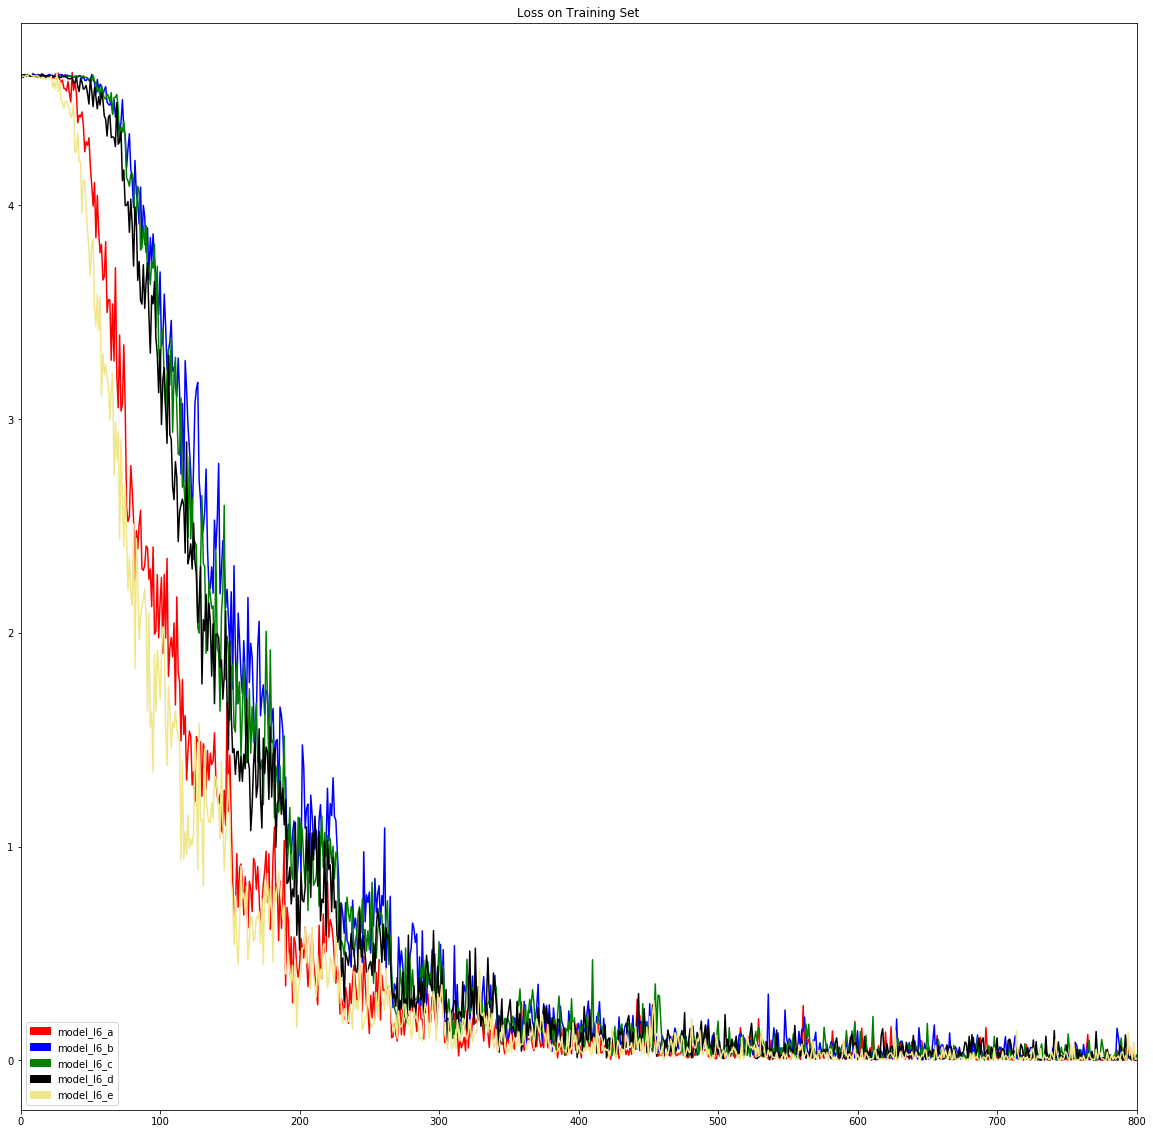

In [23]:
red_patch = mpatches.Patch(color='red', label='model_l6_a')
blue_patch = mpatches.Patch(color='blue', label='model_l6_b')
green_patch = mpatches.Patch(color='green', label='model_l6_c')
black_patch = mpatches.Patch(color='black', label='model_l6_d')
khaki_patch = mpatches.Patch(color='khaki', label='model_l6_e')
# silver_patch = mpatches.Patch(color='silver', label='model_l6_f')

plt.figure(figsize=(20, 20))
plt.legend(handles=[red_patch,blue_patch,green_patch,black_patch,khaki_patch]#,silver_patch
           , loc = 'lower left')
plt.title('Loss on Training Set')
plt.plot(model_l6_a.all_losses, 'red')
plt.plot(model_l6_b.all_losses, 'blue')
plt.plot(model_l6_c.all_losses, 'green')
plt.plot(model_l6_d.all_losses, 'black')
plt.plot(model_l6_e.all_losses, 'khaki')
# plt.plot(model_l6_f.all_losses, 'silver')

plt.xlim(0,800)
plt.show()

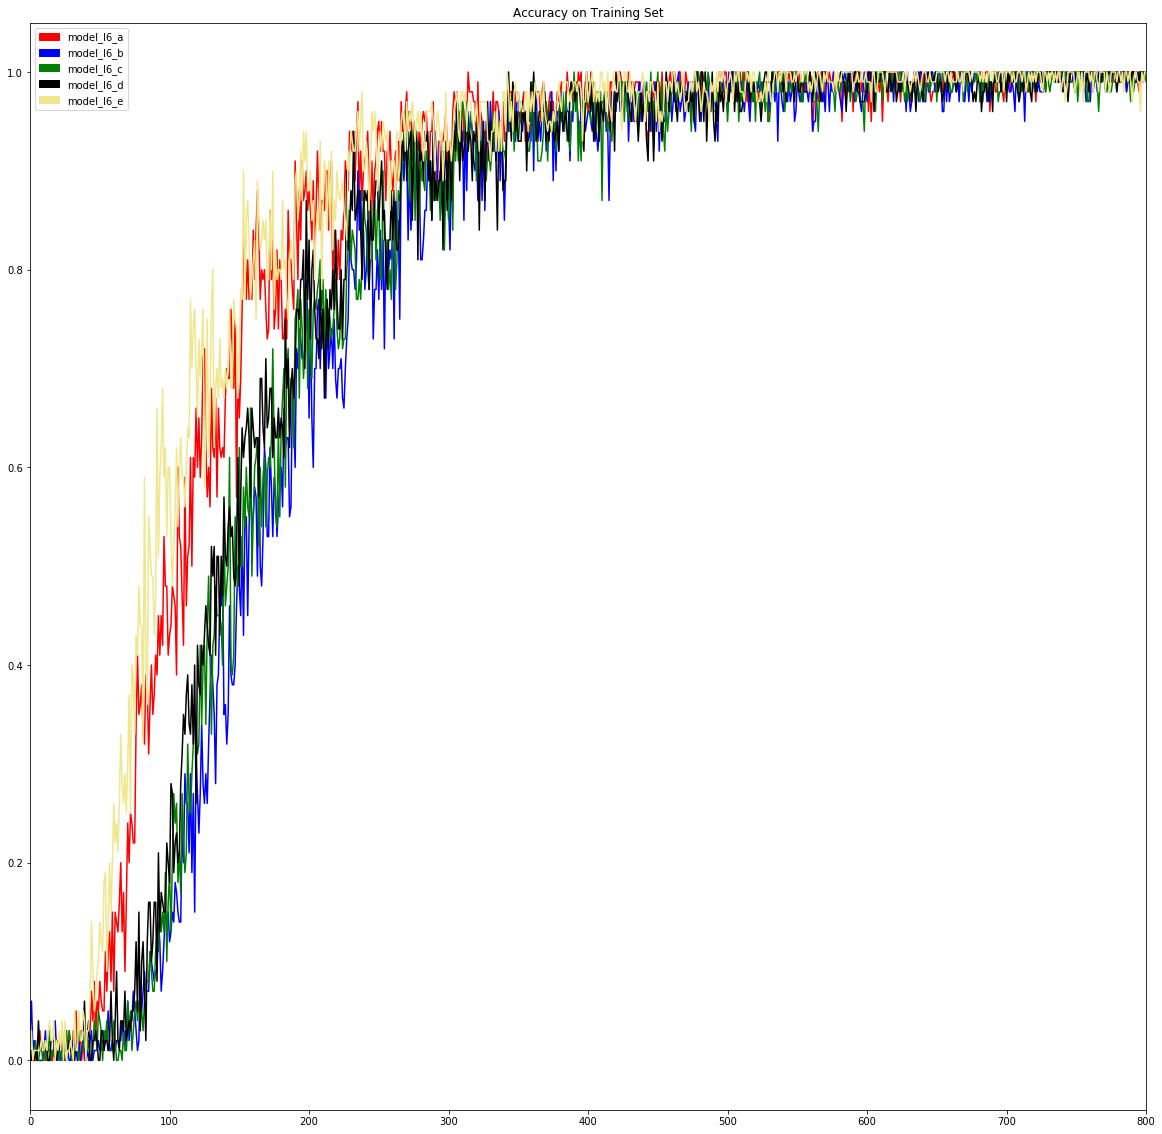

In [24]:
plt.figure(figsize=(20, 20))
plt.legend(handles=[red_patch,blue_patch,green_patch,black_patch,khaki_patch]#,silver_patch
           , loc = 'upper left')
plt.title('Accuracy on Training Set')
plt.plot(model_l6_a.train_accuracy, 'red')
plt.plot(model_l6_b.train_accuracy, 'blue')
plt.plot(model_l6_c.train_accuracy, 'green')
plt.plot(model_l6_d.train_accuracy, 'black')
plt.plot(model_l6_e.train_accuracy, 'khaki')
# plt.plot(model_l6_f.train_accuracy, 'silver')

plt.xlim(0,800)
plt.show()

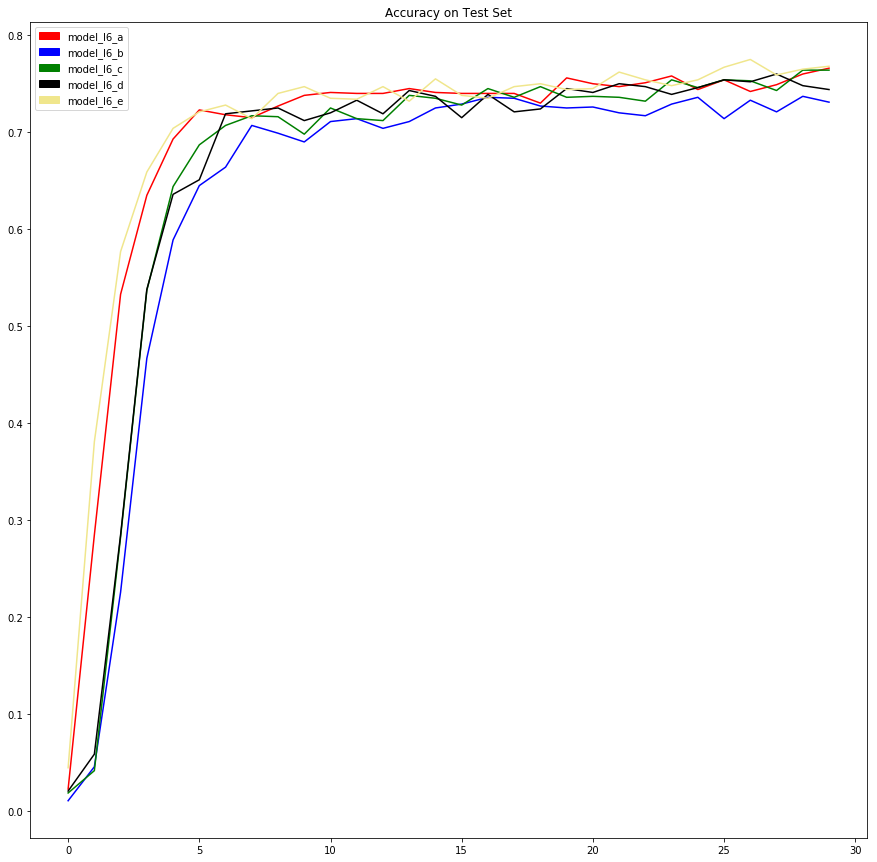

In [22]:
plt.figure(figsize=(15, 15))
plt.legend(handles=[red_patch,blue_patch,green_patch,black_patch,khaki_patch]#,silver_patch
           , loc = 'upper left')
plt.title('Accuracy on Test Set')
plt.plot(model_l6_a.test_accuracy, 'red')
plt.plot(model_l6_b.test_accuracy, 'blue')
plt.plot(model_l6_c.test_accuracy, 'green')
plt.plot(model_l6_d.test_accuracy, 'black')
plt.plot(model_l6_e.test_accuracy, 'khaki')
# plt.plot(model_l6_f.test_accuracy, 'silver')

# plt.xlim(0,30)
plt.show()